In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('fetaldataset.csv')
df

,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,fetal_health
0,0.000,0.000,0.000,0.000,0.0,0.0,2
1,0.006,0.000,0.006,0.003,0.0,0.0,1
2,0.003,0.000,0.008,0.003,0.0,0.0,1
3,0.003,0.000,0.008,0.003,0.0,0.0,1
4,0.007,0.000,0.008,0.000,0.0,0.0,1
...,...,...,...,...,...,...,...
2121,0.000,0.000,0.007,0.000,0.0,0.0,2
2122,0.001,0.000,0.007,0.000,0.0,0.0,2
2123,0.001,0.000,0.007,0.000,0.0,0.0,2
2124,0.001,0.000,0.006,0.000,0.0,0.0,2


In [10]:
set(df['fetal_health'].values)

{1, 2, 3}

In [11]:
X_df = df.drop('fetal_health', axis=1)
X = X_df.values
y_df = df[['fetal_health']]
y = y_df.values

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X=X_train, y=y_train)

y_test_pred = tree_clf.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true=y_test, y_pred=y_test_pred)

0.8098591549295775

In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=y_test, y_pred=y_test_pred)

array([[331,   0,   2],
       [ 61,   0,   3],
       [ 15,   0,  14]], dtype=int64)

[Text(167.4, 181.2, 'accelerations <= 0.001\ngini = 0.369\nsamples = 1700\nvalue = [1322, 231, 147]\nclass = 1'),
 Text(83.7, 108.72, 'prolongued_decelerations <= 0.002\ngini = 0.587\nsamples = 716\nvalue = [398, 195, 123]\nclass = 1'),
 Text(41.85, 36.23999999999998, 'gini = 0.545\nsamples = 655\nvalue = [392, 190, 73]\nclass = 1'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.312\nsamples = 61\nvalue = [6, 5, 50]\nclass = 3'),
 Text(251.10000000000002, 108.72, 'prolongued_decelerations <= 0.002\ngini = 0.116\nsamples = 984\nvalue = [924, 36, 24]\nclass = 1'),
 Text(209.25, 36.23999999999998, 'gini = 0.079\nsamples = 956\nvalue = [917, 34, 5]\nclass = 1'),
 Text(292.95, 36.23999999999998, 'gini = 0.472\nsamples = 28\nvalue = [7, 2, 19]\nclass = 3')]

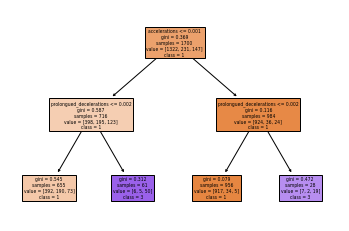

In [16]:
from sklearn.tree import plot_tree

plot_tree(tree_clf, filled=True, feature_names=X_df.columns.values, class_names=['1', '2', '3'])